### Chapter 13. 텍스트 데이터 빈도 분석

### Part II
교보문고의 홈페이지 구성이 바뀌어 아래의 내용을 실행시키는 경우 올바르게 작동되지 않습니다. <br>
코드 내용은 참고만 하시기 바랍니다.

빈도 분석

- 교보문고에 최근 등록되는 책들의 소개글에는 어떤 내용이 주로 있을까?
   - 책 상세 페이지 안의 책 소개글 크롤링
   - wordcloud를 활용하여 빈도수에 따른 텍스트 데이터 시각화

#### 코드 13.14

In [ ]:
#웹 크롤링
import requests
from bs4 import BeautifulSoup

url = "http://www.kyobobook.co.kr/newproduct/newTopicKorSimpleList.laf"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'html.parser') #html 전체가 잘 안가져와지면 파서를 바꿔보기: "html.parser" "lxml" "html5lib" 등
#print(soup)
book_detail_url = []
#크롤링할 태그 조건 설정
dd = soup.select("dd.book_title > strong > a") #book_tile 클래스인 dd태그 안의 strong태그 안의 a태그만 선택
for n in dd:
  print(n.get_text()) #책 제목
  print(n["href"]) #책 상세페이지 링크
  book_detail_url.append(n["href"]) 


그레이트 인플루엔자

javascript:goDetailProductNotAge('KOR','290501','9791191689037','0 ', 'N')

모두를 위한 허리 교과서

javascript:goDetailProductNotAge('KOR','090919','9791191426335','0 ', 'N')

명화들이 말해주는 그림 속 왕실 

javascript:goDetailProductNotAge('KOR','23030101','9791186972915','0 ', 'N')

카피 쓰는 법(땅콩문고)

javascript:goDetailProductNotAge('KOR','150304','9791167700179','0 ', 'N')

역사의 원전(개정판)(양장본 Ha

javascript:goDetailProductNotAge('KOR','190303','9791166890369','0 ', 'N')

클린 아키텍처(만들면서 배우는)(

javascript:goDetailProductNotAge('KOR','330113','9791158392758','0 ', 'N')

원피스. 100: 패왕색

javascript:goDetailProductNotAge('KOR','4717','9791136289001','0 ', 'N')

당신이 내 이름을 불러준 순간

javascript:goDetailProductNotAge('KOR','050101','9791130678115','0 ', 'N')

나와 평등한 말(너머학교 오늘의 

javascript:goDetailProductNotAge('KOR','3827','9788994407920','0 ', 'N')

이은경 쌤과 함께하는 초등학교 입

javascript:goDetailProductNotAge('KOR','070501','9788960305892','0 ', 'N')

이코노미스트 2022 세계대전망

javascript:goDetailProductNotAge('KOR','130911'

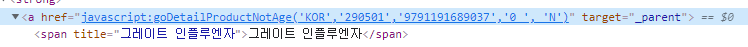
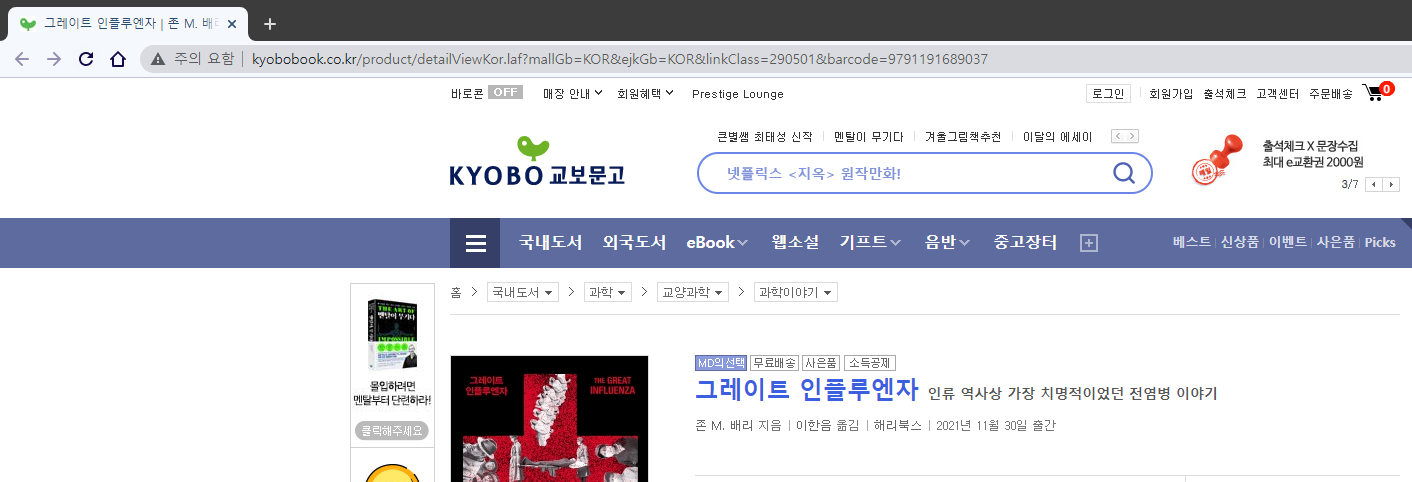
- 상서페이지로 연결되는 링크가 url이 아닌 자바스크립트 형식이라 beautifulsoup로는 바로 접근 불가능.
  - 이를 해결하기 위해 자바스크립트를 실행할 수 있는 Selenium 활용하거나
  - 또는 상세페이지 url를 잘 살펴보면 자바스크립트 함수 호출의 파라미터가 들어있음 

    -> 책별 linkClass와 barcode번호를 html에서 가져와 상세페이지 url을 직접 만들기

#### 코드 13.15

In [ ]:
#각 상세페이지 url에서 책 소개글 크롤링
import re

for i, link in enumerate(book_detail_url):
  # javascript:goDetailProductNotAge('KOR','290501','9791191689037','0 ', 'N') 형식에서 작은 따옴표로 묶여있는 숫자 부분들 추출 -> url로 request보낼 때 포함
  p = re.compile("'([0-9]+)'") #작은따옴표로 묶인 숫자들 그룹핑
  m = p.findall(link)
  print(m)
  linkClass = m[0] # 숫자들로만 이루어진 첫번째 파라미터 : linkClass
  barcode = m[1] # 숫자들로만 이루어진 두번째 파라미터 : barcode
  book_detail_url[i] = f"http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb={'KOR'}&ejkGb={'KOR'}&linkClass={linkClass}&barcode={barcode}"
  print(book_detail_url[i])


['290501', '9791191689037']
http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&linkClass=290501&barcode=9791191689037
['090919', '9791191426335']
http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&linkClass=090919&barcode=9791191426335
['23030101', '9791186972915']
http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&linkClass=23030101&barcode=9791186972915
['150304', '9791167700179']
http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&linkClass=150304&barcode=9791167700179
['190303', '9791166890369']
http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&linkClass=190303&barcode=9791166890369
['330113', '9791158392758']
http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&linkClass=330113&barcode=9791158392758
['4717', '9791136289001']
http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&linkClass=4717&barcode=9791136289001
['050101', '9

- 만약 비정상적인 접근으로 판단하여 접근이 막히면, request를 보낼 때 브라우저별 기본 header를 포함하여 보내면 보통 해결된다.

#### 코드 13.16

In [ ]:
article_text = ""

headers = { 'User-Agent' : ('Mozilla/5.0 (Windows NT 10.0;Win64; x64)\
AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98\
Safari/537.36') }  #브라우저별 header 작성

for url in book_detail_url:
  resp = requests.get(url, headers) #header 포함
  soup = BeautifulSoup(resp.text, 'html.parser') 

  article = soup.select("div.box_detail_article") #box_detail_article 클래스인 div태그만 선택
  for n in article:
    print(n.get_text()) #책 소개 아티클
    article_text += '\n' + n.get_text()


		
			
			
				“우리는 지금 미증유의 시대에 살고 있다. 하지만 우리가 역사에서 
그 비교 대상을 찾고자 한다면 1918년 독감 팬데믹에서 가장 흡사한 모습을 찾을 수 있다. 
배리는 인류 역사상 가장 치명적이었던 유행병에 관해 우리가 알아야 할 거의 모든 것을 알려준다. 
1918년은 지금과 아주 다른 시대였지만, 『그레이트 인플루엔자』는 
우리가 많은 면에서 여전히 똑같은 도전에 직면해 있음을 상기시켜 주는 훌륭한 책이다.”  
-빌 게이츠
			
		
	

		들어가는 말

1부 전사들
2부 무리
3부 불씨
4부 시작
5부 폭발
6부 역병
7부 경주
8부 조종 소리
9부 여파
10부 결말

후기

감사의 말
주
참고문헌
찾아보기 
옮긴이의 말
	


						“우리는 지금 미증유의 시대에 살고 있다. 하지만 우리가 역사에서 그 비교 대상을 찾고자 한다면 1918년 독감 팬데믹에서 가장 흡사한 모습을 찾을 수 있다. 배리는 인류 역사상 가장 치명적이었던 유행병에 관해 우리가 알아야...
						
							더보기


							“우리는 지금 미증유의 시대에 살고 있다. 하지만 우리가 역사에서 그 비교 대상을 찾고자 한다면 1918년 독감 팬데믹에서 가장 흡사한 모습을 찾을 수 있다. 배리는 인류 역사상 가장 치명적이었던 유행병에 관해 우리가 알아야 할 거의 모든 것을 알려준다. 1918년은 지금과 아주 다른 시대였지만, 「그레이트 인플루엔자」는 우리가 많은 면에서 여전히 똑같은 도전에 직면해 있음을 상기시켜 주는 훌륭한 책이다.”
							닫기




						“이 주제에 관한 가장 완전하고, 가장 풍부하고, 가장 포괄적인 역사”
						
					



						“기념비적인 책. …… 거장의 필치로 쓴 과학, 정치, 문화에 대한 권위 있고 충격적인 이야기다. …… 배리의 책이 가진 힘의 하나는 그것이 의학적 사실들과 수치들을 훌쩍 넘어선다는 데 있다. …… 이 책은 시종일관 진짜 인...
						
							더보기


#### 코드 13.17

In [ ]:
!pip install wordcloud

#### 코드 13.18

In [ ]:
#단어의 빈도수에 따라 워드 클라우드 만들기
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

spwords = set(STOPWORDS)  # 제외할 단어 집합

spwords.update(['그','것','저자','책','더보기','이']) # 무의미한 단어들 추가하기

#### 코드 13.19

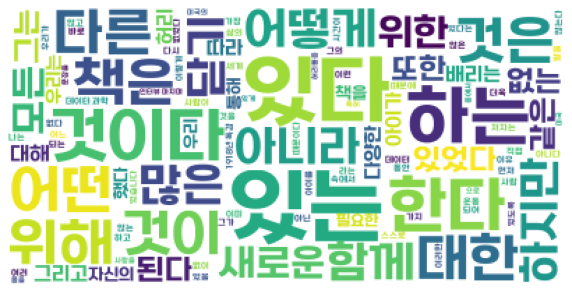

In [ ]:
with open('article_text.txt', 'r', encoding='CP949') as f:
    article_text = f.read()
    
#한글 폰트 출처: https://sandbox.co.kr/fonts/aggro
font_file = "SB 어그로 M.ttf" # Mac에선 "SB 어그로OTF M.otf"

wc = WordCloud(max_font_size=60, stopwords=spwords, 
               font_path=font_file, background_color='white')
my_wordcloud = wc.generate(article_text)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(my_wordcloud)
plt.show()

- 한글 형태소 분석기 Okt를 이용해서 명사만 골라주기


#### 코드 13.20

In [ ]:
!pip install konlpy

#### 코드 13.21

In [ ]:
#Okt를 이용하여 책 소개 텍스트들의 형태소 분석
from konlpy.tag import Okt
okt = Okt()

word_dict = okt.pos(article_text) 
print(word_dict)

[('\n\r\n\t\t\r\n\t\t\t\r\n\t\t\t\r\n\t\t\t\t', 'Foreign'), ('“', 'Foreign'), ('우리', 'Noun'), ('는', 'Josa'), ('지금', 'Noun'), ('미', 'Adjective'), ('증', 'Noun'), ('유의', 'Noun'), ('시대', 'Noun'), ('에', 'Josa'), ('살', 'Noun'), ('고', 'Josa'), ('있다', 'Adjective'), ('.', 'Punctuation'), ('하지만', 'Conjunction'), ('우리', 'Noun'), ('가', 'Josa'), ('역사', 'Noun'), ('에서', 'Josa'), ('그', 'Noun'), ('비교', 'Noun'), ('대상', 'Noun'), ('을', 'Josa'), ('찾고자', 'Verb'), ('한다면', 'Verb'), ('1918년', 'Number'), ('독감', 'Noun'), ('팬데믹', 'Noun'), ('에서', 'Josa'), ('가장', 'Noun'), ('흡사한', 'Adjective'), ('모습', 'Noun'), ('을', 'Josa'), ('찾을', 'Verb'), ('수', 'Noun'), ('있다', 'Adjective'), ('.', 'Punctuation'), ('배리', 'Noun'), ('는', 'Josa'), ('인류', 'Noun'), ('역사상', 'Noun'), ('가장', 'Noun'), ('치명', 'Noun'), ('적', 'Suffix'), ('이었던', 'Verb'), ('유행병', 'Noun'), ('에', 'Josa'), ('관해', 'Noun'), ('우리', 'Noun'), ('가', 'Josa'), ('알아야', 'Verb'), ('할', 'Verb'), ('거의', 'Noun'), ('모든', 'Noun'), ('것', 'Noun'), ('을', 'Josa'), ('알려', 'Verb'), ('준다'

#### [참고]

In [ ]:
#명사인 단어만 골라서 리스트에 넣기
noun_list = []

for word, tag in word_dict:
    if tag == 'Noun': #명사이고
      if word not in spwords: #제외단어가 아닐 때만
        noun_list.append(word)

print(noun_list)

['우리', '지금', '증', '유의', '시대', '살', '우리', '역사', '비교', '대상', '독감', '팬데믹', '가장', '모습', '수', '배리', '인류', '역사상', '가장', '치명', '유행병', '관해', '우리', '거의', '모든', '지금', '아주', '다른', '시대', '그레이', '트', '인플루엔자', '우리', '면', '도전', '직면', '음', '상기', '게이츠', '말', '부', '전사', '부', '무리', '부', '불씨', '부', '시작', '부', '폭발', '부', '역병', '부', '경주', '부', '조종', '소리', '부', '여파', '부', '결말', '후기', '감사', '말', '주', '참고문헌', '말', '우리', '지금', '증', '유의', '시대', '살', '우리', '역사', '비교', '대상', '독감', '팬데믹', '가장', '모습', '수', '배리', '인류', '역사상', '가장', '치명', '유행병', '관해', '우리', '더', '보기', '우리', '지금', '증', '유의', '시대', '살', '우리', '역사', '비교', '대상', '독감', '팬데믹', '가장', '모습', '수', '배리', '인류', '역사상', '가장', '치명', '유행병', '관해', '우리', '거의', '모든', '지금', '아주', '다른', '시대', '그레이', '트', '인플루엔자', '우리', '면', '도전', '직면', '음', '상기', '주제', '관', '가장', '가장', '가장', '포괄', '역사', '기념비', '거장', '과학', '정치', '문화', '대한', '권위', '충격', '이야기', '배리', '힘', '하나', '그것', '의학', '사실', '수치', '훌쩍', '데', '시종일관', '진짜', '인', '더', '보기', '기념비', '거장', '과학', '정치', '문화', '대한', '권위', '충격', '

#### [참고]

In [ ]:
#명사 단어의 빈도수 측정하여 빈도별 정렬
from collections import Counter

count = Counter(noun_list)
words = (dict(count.most_common()))
print(words)

{'수': 221, '사람': 172, '우리': 154, '말': 150, '더': 138, '허리': 136, '아이': 129, '데이터': 115, '통증': 105, '등': 97, '때': 93, '이야기': 88, '사랑': 86, '과학자': 85, '운동': 79, '과학': 75, '환자': 69, '가장': 67, '내': 67, '자신': 66, '엄마': 66, '나': 64, '생각': 63, '신부': 62, '일': 61, '이태석': 61, '쪽': 60, '삶': 60, '치매': 60, '역사': 59, '세계': 59, '하나': 58, '위': 58, '장': 58, '전': 57, '부': 56, '보기': 56, '몸': 56, '독감': 55, '모든': 54, '위해': 53, '법': 53, '시간': 53, '기록': 52, '문장': 52, '시작': 49, '가지': 48, '마음': 48, '팬데믹': 47, '관': 47, '치료': 47, '대한': 46, '다른': 45, '배리': 44, '여성': 44, '의': 44, '속': 43, '중': 43, '미국': 43, '의학': 42, '데': 42, '사회': 41, '이유': 41, '무엇': 41, '때문': 40, '변화': 40, '문제': 39, '순간': 38, '은': 38, '시대': 37, '준비': 37, '학교': 37, '설명': 34, '모두': 34, '안': 34, '병': 34, '자세': 34, '존재': 33, '또한': 33, '의미': 33, '현장': 33, '사태': 32, '전쟁': 32, '사건': 32, '통해': 32, '방법': 32, '세상': 32, '사실': 31, '작가': 31, '죽음': 31, '대해': 31, '이름': 31, '관계': 31, '단어': 31, '지금': 30, '인간': 30, '모습': 29, '다시': 29, '원인': 29, '알': 29, '코로나': 29,

#### [참고]

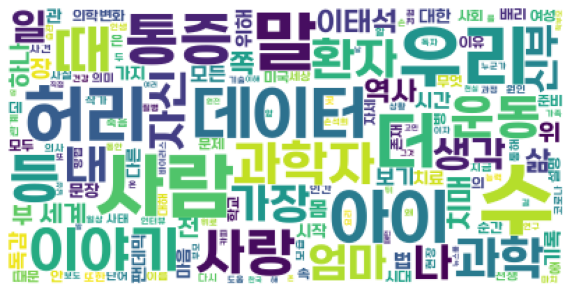

In [ ]:
#빈도수 명사 딕셔너리로 워드클라우드 만들기
wc2 = WordCloud(max_font_size=60, stopwords=spwords, font_path=font_file, background_color='white')
my_wordcloud2 = wc2.generate_from_frequencies(dict(words))

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(my_wordcloud2)
plt.show()

#### [참고]

In [ ]:
# 이미지 파일로 저장
my_wordcloud2.to_file("./my_wordcloud.png")